# **Problem Statement :** A person wants to buy a house. So he searched for a broker but he is not satisfied with the results. So we have predict the price of the house with Data Science and Machine Learning

# **Data Collection and Analysis**

###Dataset we used here is our own dataset.

In [1]:
import pandas as pd

In [3]:
#convert the csv file into dataframe
df = pd.read_csv('housepricedata.csv')
df

,area,bedroom,age,price
0,1500,2.0,4,8000000
1,2000,3.0,10,8500000
2,2200,2.0,4,10000000
3,2600,4.0,3,12000000
4,3000,NaN,2,13200000
5,3200,3.0,10,10000000
6,3400,2.0,3,13000000
7,3600,4.0,6,16000000
8,4000,4.0,2,20000000


In [4]:
#age in the dataframe represens  the age of the house

In [6]:
#bedroom column has no data in 4th row 
#we have to calculate the median value to predict the missing value
import math
bedroommedian = math.floor(df['bedroom'].median())
bedroommedian

3

In [7]:
#fill the missed value in df using fillna()
df['bedroom'] = df['bedroom'].fillna(bedroommedian)
df['bedroom']

0    2.0
1    3.0
2    2.0
3    4.0
4    3.0
5    3.0
6    2.0
7    4.0
8    4.0
Name: bedroom, dtype: float64

In [8]:
df

,area,bedroom,age,price
0,1500,2.0,4,8000000
1,2000,3.0,10,8500000
2,2200,2.0,4,10000000
3,2600,4.0,3,12000000
4,3000,3.0,2,13200000
5,3200,3.0,10,10000000
6,3400,2.0,3,13000000
7,3600,4.0,6,16000000
8,4000,4.0,2,20000000


# **Preparing X and y**

In [9]:
X = df.drop('price', axis = 1)
X

,area,bedroom,age
0,1500,2.0,4
1,2000,3.0,10
2,2200,2.0,4
3,2600,4.0,3
4,3000,3.0,2
5,3200,3.0,10
6,3400,2.0,3
7,3600,4.0,6
8,4000,4.0,2


In [10]:
y = df['price']
y

0     8000000
1     8500000
2    10000000
3    12000000
4    13200000
5    10000000
6    13000000
7    16000000
8    20000000
Name: price, dtype: int64

# **Data Visualization**

In [11]:
import matplotlib.pyplot as plt

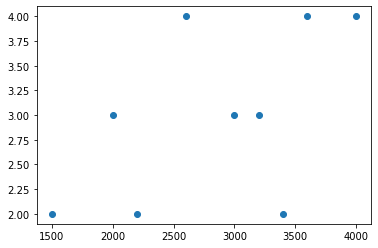

In [14]:
plt.scatter(df['area'], df['bedroom'])

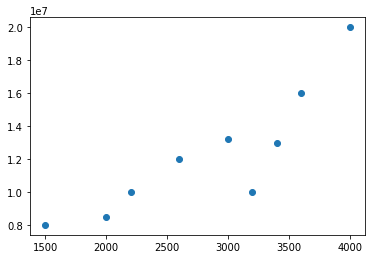

In [16]:
plt.scatter(df['area'], df['price'])

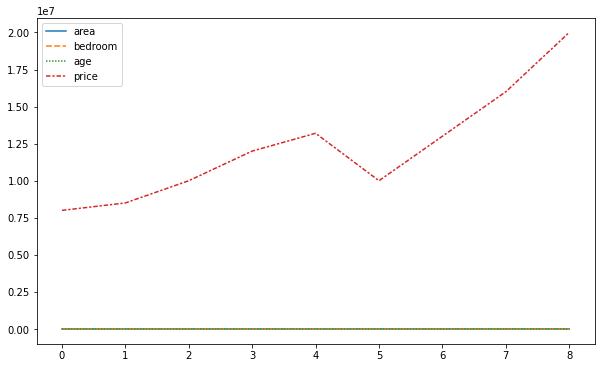

In [20]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.lineplot(data=df)

# **Machine Learning Part**

In [22]:
from sklearn import linear_model

In [25]:
#creating a object reference to linear_model
reg = linear_model.LinearRegression()

In [26]:
#train the data
reg.fit(X, y)

LinearRegression()

In [27]:
#predict the output
reg.predict([[3700,4,3]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([17001127.00349893])

In [29]:
#accuracy
reg.score(X,y)

0.9161518314935886

# **Understanding the ML part**

In [30]:
m = reg.coef_
m

array([   3014.96593569, 1275600.93322491, -430176.49023854])

In [31]:
m1 = 3014.96593569
m2 = 1275600.93322491
m3 = 430176.49023854

In [33]:
b = reg.intercept_
b

2033878.7792481221

In [34]:
#y = mX+b
y = (m1*3700) + (m2*4) + (m3*3) + b
y

19582185.944916382

In [35]:
#downloading the ML model using pickle
import pickle

In [36]:
with open('housepricemodel', 'wb') as f:
  pickle.dump(reg, f)